# Desafio Técnico A3 Data
---




Dados armazenados no Google Drive


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Para executar no Google Colab

Executar trecho de código a seguir para consumir dados no Google Drive. 
Os dados serão automaticamente baixados para o mesmo diretorio do Notebook. 

É necessário dar permissão no Google Colab para consumir arquivo no Google Drive. 

Para execução local salte os trechos de código a seguir e altere o caminho (path) dos arquivos para caminho correto. 

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:
# Ocorrência --> https://drive.google.com/file/d/11f-2A-Jb2swqE1NUPYATV1uKIVJU9Aet/view?usp=share_link
# Aeronave --> https://drive.google.com/file/d/1Y8SemQ8CYL-hlC2EHc5ddphT4hy71ntZ/view?usp=share_link
# Fator Contribuinte --> https://drive.google.com/file/d/1dpVZLNlU3xVcgqCjpGItIYdWoLSm6ibA/view?usp=share_link
# Ocorrência original --> https://drive.google.com/file/d/18p_drgOT2FVb07UgQrl-X3hG7gH7GUqx/view?usp=share_link


# Data Frame de ocorrências
arquivoGoogleDrive = drive.CreateFile({'id':'11f-2A-Jb2swqE1NUPYATV1uKIVJU9Aet'})
arquivoGoogleDrive.GetContentFile('ocorrencia.csv')

# Data Frame de aeronaves
arquivoGoogleDrive = drive.CreateFile({'id':'1Y8SemQ8CYL-hlC2EHc5ddphT4hy71ntZ'})
arquivoGoogleDrive.GetContentFile('aeronave.csv')

# Data Frame de fatores contribuintes
arquivoGoogleDrive = drive.CreateFile({'id':'1dpVZLNlU3xVcgqCjpGItIYdWoLSm6ibA'})
arquivoGoogleDrive.GetContentFile('fator_contribuinte.csv')

# Data Frame de ocorrência CENIPA
arquivoGoogleDrive = drive.CreateFile({'id':'18p_drgOT2FVb07UgQrl-X3hG7gH7GUqx'})
arquivoGoogleDrive.GetContentFile('ocorrencia_original.csv')

Leitura dos arquivos para criação dos objetos Data Frame

**Aviso**

Para consumir arquivos locais altere o caminho (path) do arquivo para o local onde os arquivos estão salvos no seu ambiente. 



In [280]:
dfOcorrencia = pd.read_csv('ocorrencia.csv', delimiter=',', encoding='utf-8', 
                            na_values=['NULL', '***', '****'], index_col='codigo_ocorrencia',
                            quotechar='"')
dfAeronave = pd.read_csv('aeronave.csv', delimiter=',', encoding='utf-8', 
                            na_values=['NULL', '***'])
dfFatorContribuinte = pd.read_csv('fator_contribuinte.csv', delimiter=';', encoding='utf-8', 
                            na_values=['NULL', '***'])

Avaliação das bases de dados

In [281]:
# remoção da coluna de dia extração para evitar erro de join
dfAeronave.drop('dia_extracao', axis=1, inplace=True)


Nas saídas a seguir, podemos ver uma avaliação descritivas dos dados númericos, porem no objetivo da analise essas informações tem pouca utilidade

In [275]:
dfOcorrencia.describe()

,relatorio_publicado,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista
count,995.000000,2027.000000,2027.000000,256.000000
mean,0.993970,1.141095,1.007893,0.968750
std,0.077458,3.571001,0.103906,0.174333
min,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,83.000000,4.000000,1.000000


In [276]:
dfAeronave.describe()

,codigo_aeronave,codigo_ocorrencia,codigo_operador,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,quantidade_fatalidades
count,2043.000000,2043.000000,2043.000000,2034.000000,2043.00000,2025.000000,2039.000000,355.000000
mean,12300.670093,43961.869799,3156.447871,1.244346,5329.94420,8.928889,1902.494850,3.208451
std,7654.268691,7857.658738,1645.351104,0.483653,22004.50988,26.922299,402.024605,13.367108
min,4.000000,25799.000000,13.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,9061.000000,38839.500000,1821.000000,1.000000,844.00000,2.000000,1975.000000,1.000000
50%,11267.000000,45564.000000,3992.000000,1.000000,1633.00000,4.000000,1986.000000,2.000000
75%,13601.500000,50353.500000,3992.000000,2.000000,2155.00000,6.000000,1999.000000,2.000000
max,39147.000000,65312.000000,6270.000000,4.000000,285990.00000,301.000000,2015.000000,199.000000


In [278]:
dfFatorContribuinte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 0 to 4775
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   4776 non-null   int64 
 1   fator_nome           4776 non-null   object
 2   fator_aspecto        4776 non-null   object
 3   fator_condicionante  4287 non-null   object
 4   fator_area           4776 non-null   object
dtypes: int64(1), object(4)
memory usage: 223.9+ KB


Confirmando se o processo de leitura dos dados funcionou adequadamente

In [171]:
dfOcorrencia.tail()

,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,
36116,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,NaN,2009-03-26,04:46:00,NaN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
33715,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,NaN,2006-10-31,00:00:00,NaN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
25839,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,NaN,2006-01-03,00:00:00,NaN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
49474,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,NaN,BRASIL,NaN,2013-09-01,00:00:00,SIM,CENIPA,ATIVA,A-158/CENIPA/2013,NaN,NaN,0,1,NaN,2016-07-30
53403,ACIDENTE,OUTROS TIPOS,CAMBERLEY,EX,INGLATERRA,EGLK,2015-07-31,14:08:00,NaN,EXTERIOR,NaN,NaN,NaN,NaN,0,1,1.0,2016-07-30


Tratamento da base

Avaliação dos paises com o ocorrências
Países diferentes do Brasil são removidos 

In [174]:
dfOcorrencia.pais.value_counts(normalize=True)

BRASIL        0.996053
PARAGUAI      0.000987
URUGUAI       0.000987
COLÔMBIA      0.000493
PERU          0.000493
ARGENTINA     0.000493
INGLATERRA    0.000493
Name: pais, dtype: float64

In [175]:
# remove todas as ocorrências que não são do Brasil
dfOcorrencia.drop(dfOcorrencia[dfOcorrencia['pais'] != "BRASIL"].index, inplace = True)

In [176]:
# validação da remoção de paises diferentes do brasil
dfOcorrencia.pais.value_counts(normalize=True)

BRASIL    1.0
Name: pais, dtype: float64

In [177]:
# avaliação dos estados do Brasil
# avaliar se existem estados que não são brasileiros
dfOcorrencia.uf.value_counts(normalize=True)

SP    0.215171
RS    0.083788
PR    0.076351
MT    0.075855
MG    0.075359
GO    0.069906
RJ    0.059494
PA    0.058999
BA    0.041150
AM    0.040159
MS    0.035697
SC    0.028756
MA    0.019831
TO    0.014874
DF    0.014874
PE    0.014378
RR    0.012395
CE    0.012395
PI    0.009916
ES    0.007933
AC    0.006941
RO    0.006941
AL    0.005949
SE    0.003471
RN    0.003471
AP    0.002975
PB    0.002975
Name: uf, dtype: float64

In [178]:
# avaliação do numéro de linhas duplicadas na base de ocorrências
print("Número de linhas dúplicadas: ", (len(dfOcorrencia)-len(dfOcorrencia.drop_duplicates())))

Número de linhas dúplicadas:  0


Funcões auxiliares

In [172]:
# função para adicionar rotulos nos gráficos
def adicionarRotulos(ax, spacing=5, rotation=0, fontsize=14, format = "{:.2%}", va = 'bottom'):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing

        if y_value < 0:
            space *= -1
            va = 'top'

        label = format.format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va,
            rotation=rotation, 
            fontsize=fontsize)                      
                                        

In [173]:
# função para formatar eixos dos gráficos
def formataEixo(plt, eixo, min, max, formato):
    if eixo == "y":
        plt.ylim(min, max)
    elif eixo == "x":
        plt.xlim(min, max)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels([formato.format(x) for x in current_values])

Primeiro ponto, queremos avaliar como é o comportamento das ocorrências no Brasil. 

Para isso queremos responder as seguintes questões:

1. Quais são as maiores causas de ocorrências aeronáuticas no Brasil?
2. Quais são os estados com maior frequencia de casos?
3. Como é o comportamento da classificação da ocorrência? 
4. Como é o comportamento do tipo da ocorrência?
5. Existem fabricantes e modelos com maior incidência de ocorrências?
6. Existe algum indicativo de que o número de fatalidades esta diminuindo?
7. Como é a relação do fator humano e operacional com a distribuição de ocorrências?

Distribuição da classificação

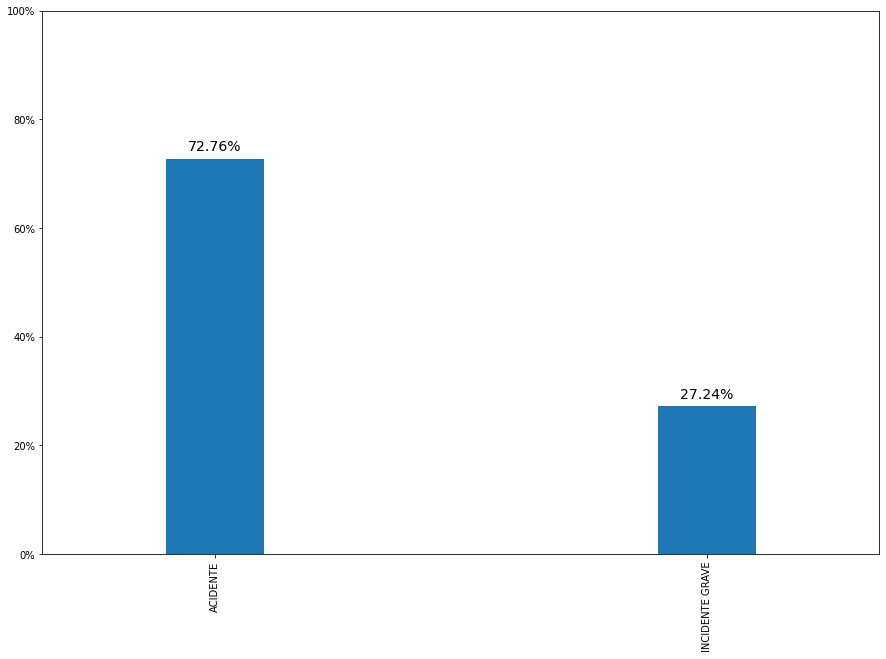

In [179]:
# distribuição de ocorrências por classificação
ax = dfOcorrencia.classificacao.value_counts(normalize=True).plot(figsize=(15, 10), kind='bar', width=0.2)
adicionarRotulos(ax)
formataEixo(plt, "y", 0, 1, "{:,.0%}")

Avaliação da ocorrência
Hipoteses:
1. a distribuição de incidentes graves não é independente do estado

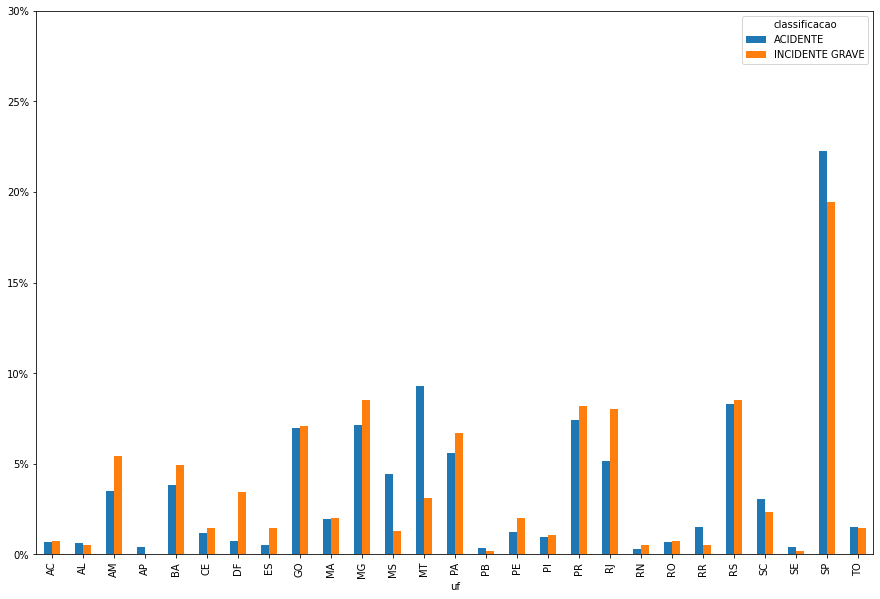

In [180]:
# avaliação da classificação da ocorrencia por estado
# hipotese: a distribuição de incidentes graves não é independente do estado
dfOcorrencia.groupby("classificacao").uf.value_counts(normalize=True).unstack(0).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax)
formataEixo(plt, "y", 0, .3, "{:,.0%}")

Teste estatístico para avaliar a hipotese de independencia da classificação do estado

In [181]:
from scipy.stats import chi2_contingency

tabela = pd.crosstab(dfOcorrencia.uf, dfOcorrencia.classificacao)

c, p, dof, expected = chi2_contingency(tabela)
print(p)

2.946233655527107e-07


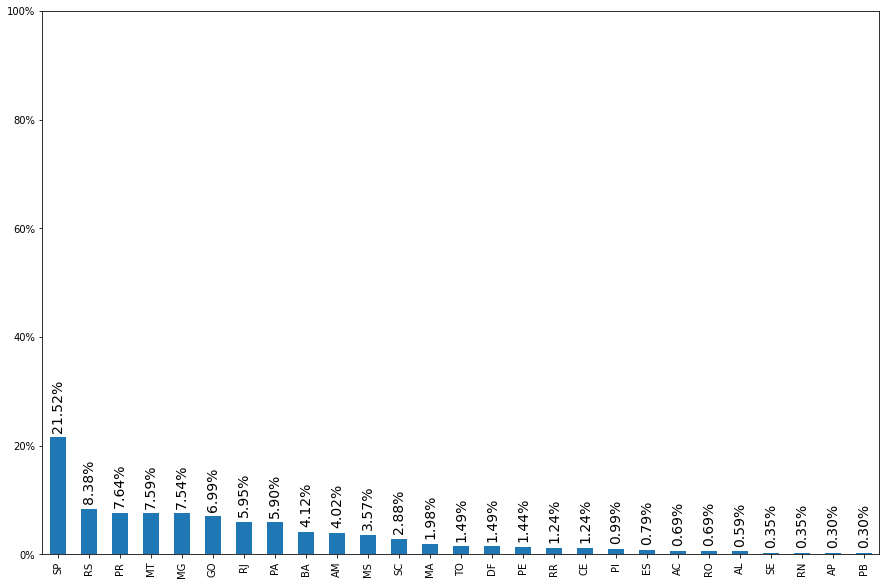

In [183]:
ax = dfOcorrencia.uf.value_counts(normalize=True).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, rotation=90)
formataEixo(plt, "y", 0, 1, "{:,.0%}")

Avaliação dos tipos de ocorrência

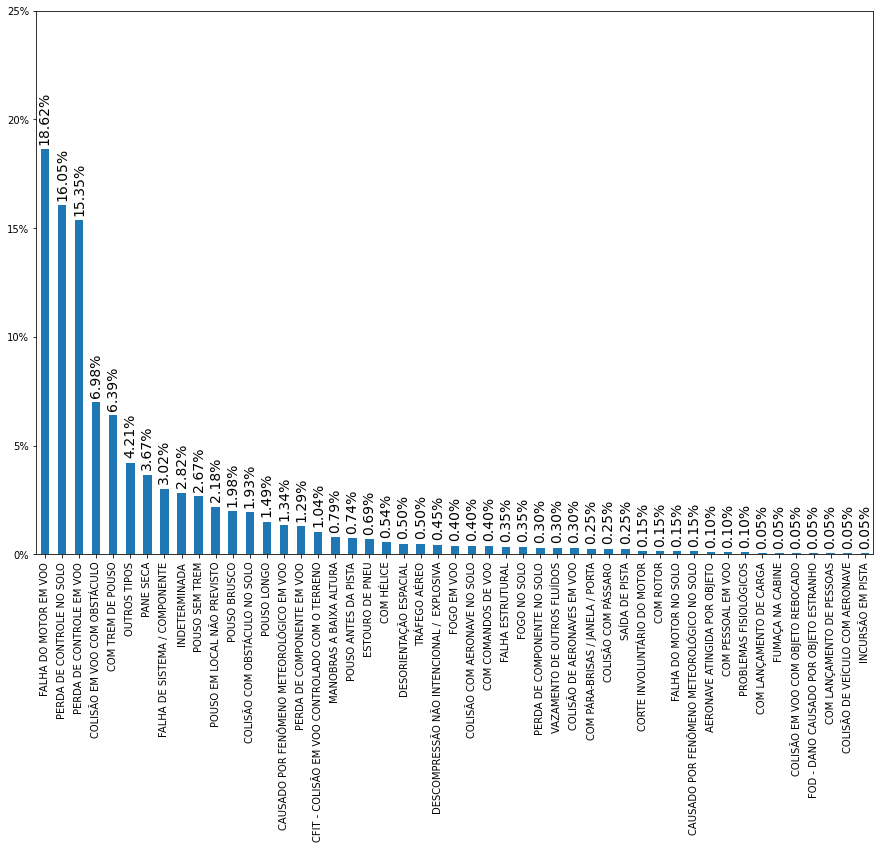

In [184]:
ax = dfOcorrencia.tipo.value_counts(normalize=True).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, rotation=90)
formataEixo(plt, "y", 0, .25, "{:,.0%}")

0.633977216443784


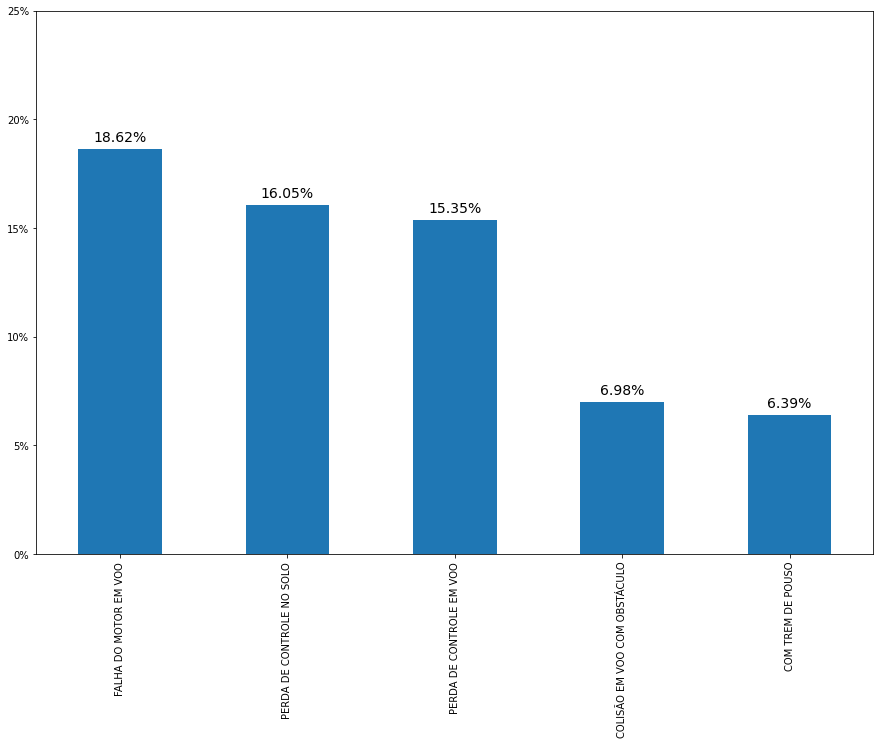

In [185]:
# tipos de ocorrência mais frequente
print(dfOcorrencia.tipo.value_counts(normalize=True).nlargest(n=5).sum())
ax = dfOcorrencia.tipo.value_counts(normalize=True).nlargest(n=5).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax)
formataEixo(plt, "y", 0, .25, "{:,.0%}")

classificacao
ACIDENTE           0.404357
INCIDENTE GRAVE    0.514545
dtype: float64


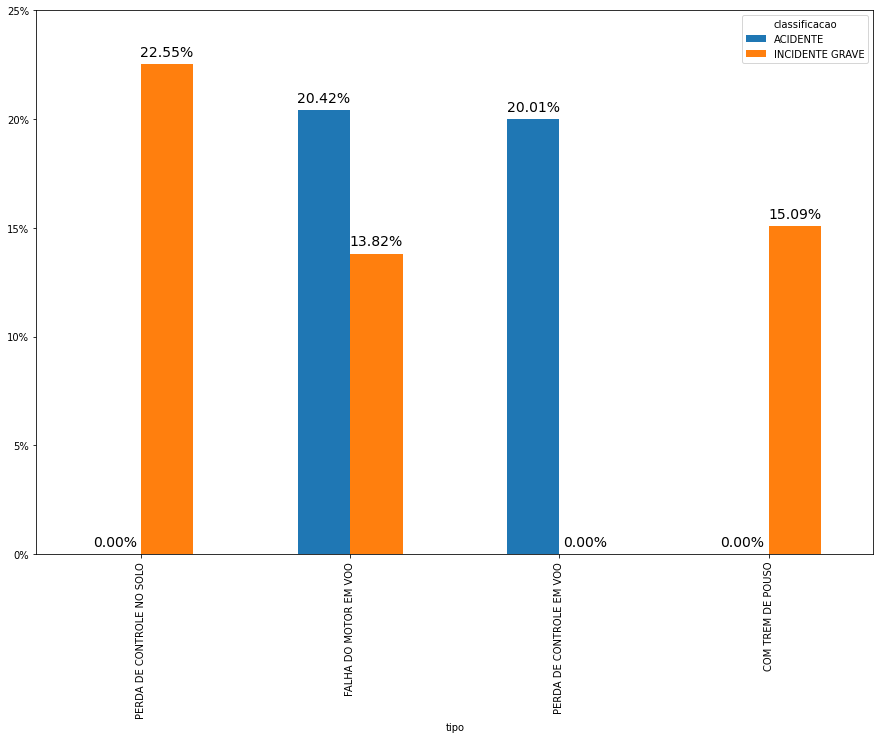

In [186]:
# tipos de ocorrência mais frequente considerando a classificação
print(dfOcorrencia.groupby("classificacao").tipo.value_counts(normalize=True).nlargest(n=5).unstack(0).sum())
ax = dfOcorrencia.groupby("classificacao").tipo.value_counts(normalize=True).nlargest(n=5).unstack(0).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax)
formataEixo(plt, "y", 0, .25, "{:,.0%}")

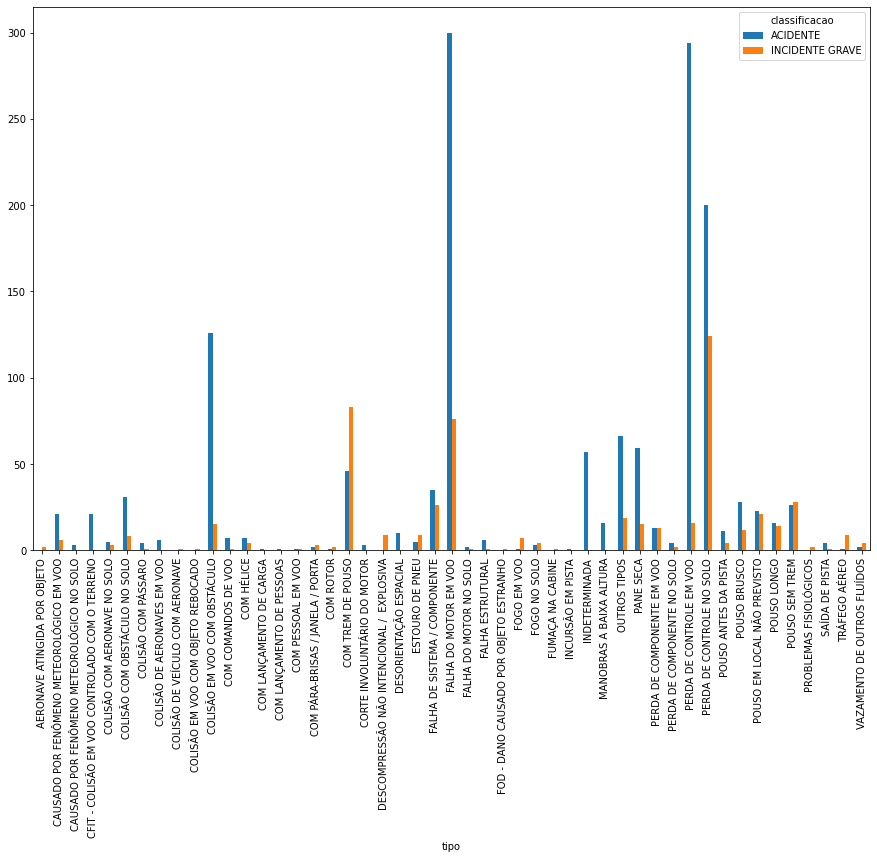

In [187]:
dfOcorrencia.groupby("classificacao").tipo.value_counts().unstack(0).plot(figsize=(15, 10), kind='bar')


Uma hipoteses sera a relação entre os aerodromos as ocorrências indicando que existem fatores nessas pontos que influência diretamente nas ocorrências.
Essa hipotese não foi confirmada devido a ausenta de dados confiaveis e também a ditribuição aproxidamente uniforme de ocorrências por aerodromo

In [188]:
# avaliação dos aerodromos

print(dfOcorrencia.aerodromo.value_counts(normalize=True).nsmallest(n=5))
print(dfOcorrencia.aerodromo.isna().sum())


SDJC    0.001241
SDTI    0.001241
SDFD    0.001241
SDJA    0.001241
SSVN    0.001241
Name: aerodromo, dtype: float64
1213


In [163]:
print(dfOcorrencia.groupby("uf").quantidade_recomendacoes.value_counts())

uf  quantidade_recomendacoes
AC  0                           8
    1                           2
    2                           2
    3                           1
    8                           1
                               ..
TO  8                           2
    2                           1
    5                           1
    7                           1
    9                           1
Name: quantidade_recomendacoes, Length: 204, dtype: int64


In [219]:
# Avaliação do Fabricante e a classificação da ocorrência
print(pd.pivot_table(dfOcorrencia.join(dfAeronave.set_index('codigo_ocorrencia')), values='tipo', index="fabricante",
                    columns=['classificacao'], aggfunc="count"))

classificacao                           ACIDENTE  INCIDENTE GRAVE
fabricante                                                       
AERO BOERO                                  63.0             63.0
AEROALCOOL TECNOLOGIA LTDA                   1.0              NaN
AEROBRAVO LTDA                               2.0              NaN
AEROCENTRO AERONAVES                         1.0              NaN
AEROMOT                                      8.0              4.0
...                                          ...              ...
TWIN COMMANDER                               2.0              2.0
ULTRALEGER                                   2.0              NaN
VECTOR ULTRALIGHT INDUSTRIA E COMERCIO       1.0              NaN
WZQ-OKECIE                                   1.0              NaN
XAVANTE                                      5.0              4.0

[119 rows x 2 columns]


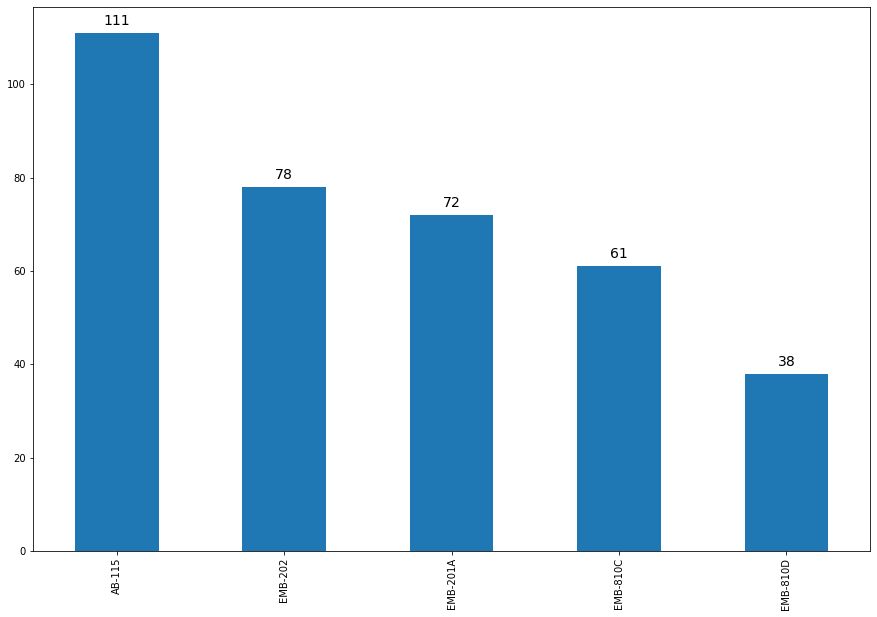

In [236]:
# Avaliação dos 5 maiores fabricantes
ax = dfOcorrencia.join(dfAeronave.set_index('codigo_ocorrencia')).fabricante.value_counts(normalize=False).nlargest(5).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, format="{:0}")


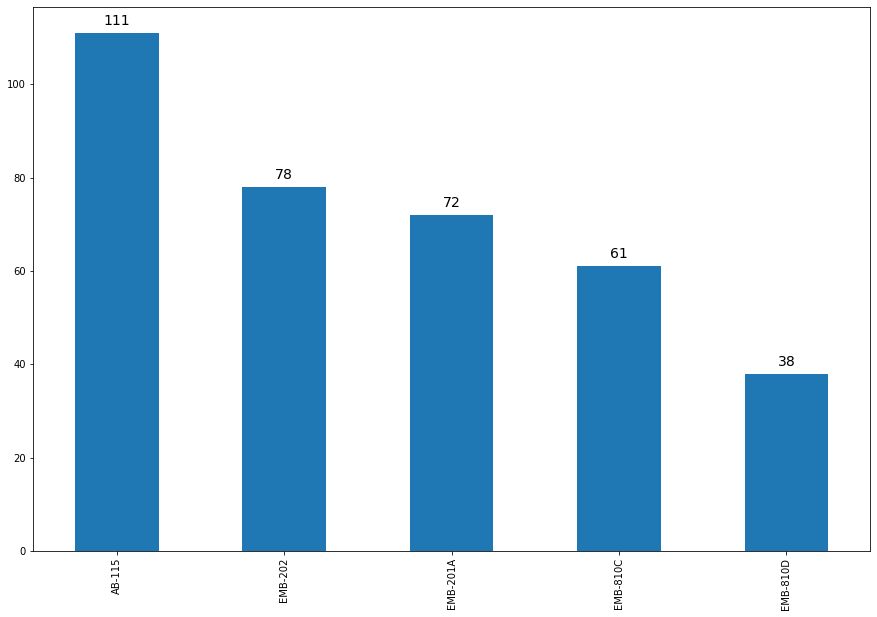

In [237]:
# Avaliação dos modelos com mais ocorrências
ax = dfOcorrencia.join(dfAeronave.set_index('codigo_ocorrencia')).modelo.value_counts(normalize=False).nlargest(5).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, format="{:0}")

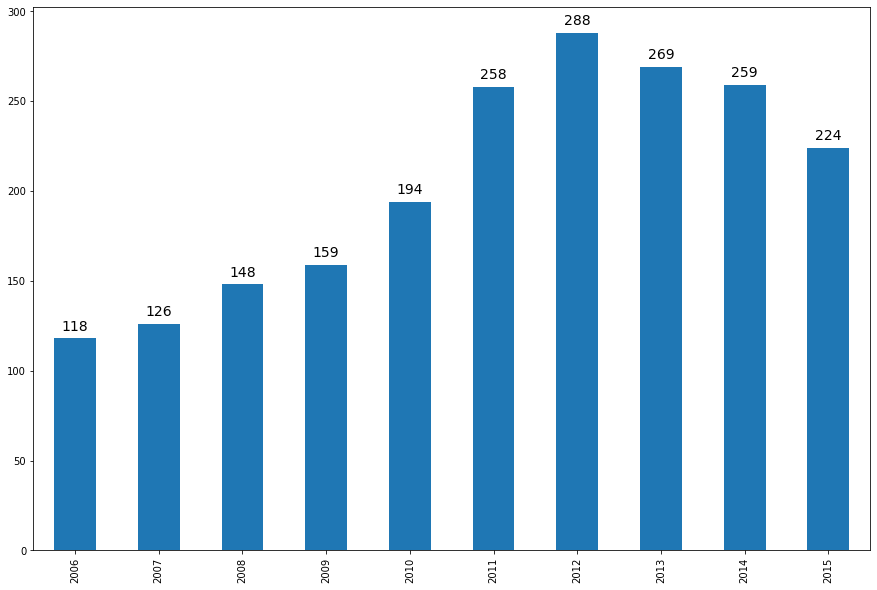

In [263]:
# Avaliação das ocorrências por ano

dfJoin = dfOcorrencia.join(dfAeronave.set_index('codigo_ocorrencia'))
dfJoin["ano"] = pd.DatetimeIndex(dfJoin['dia_ocorrencia']).year

ax = dfJoin.ano.sort_values().value_counts(sort=False).plot(figsize=(15, 10), kind="bar")
adicionarRotulos(ax, format="{:0}")

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


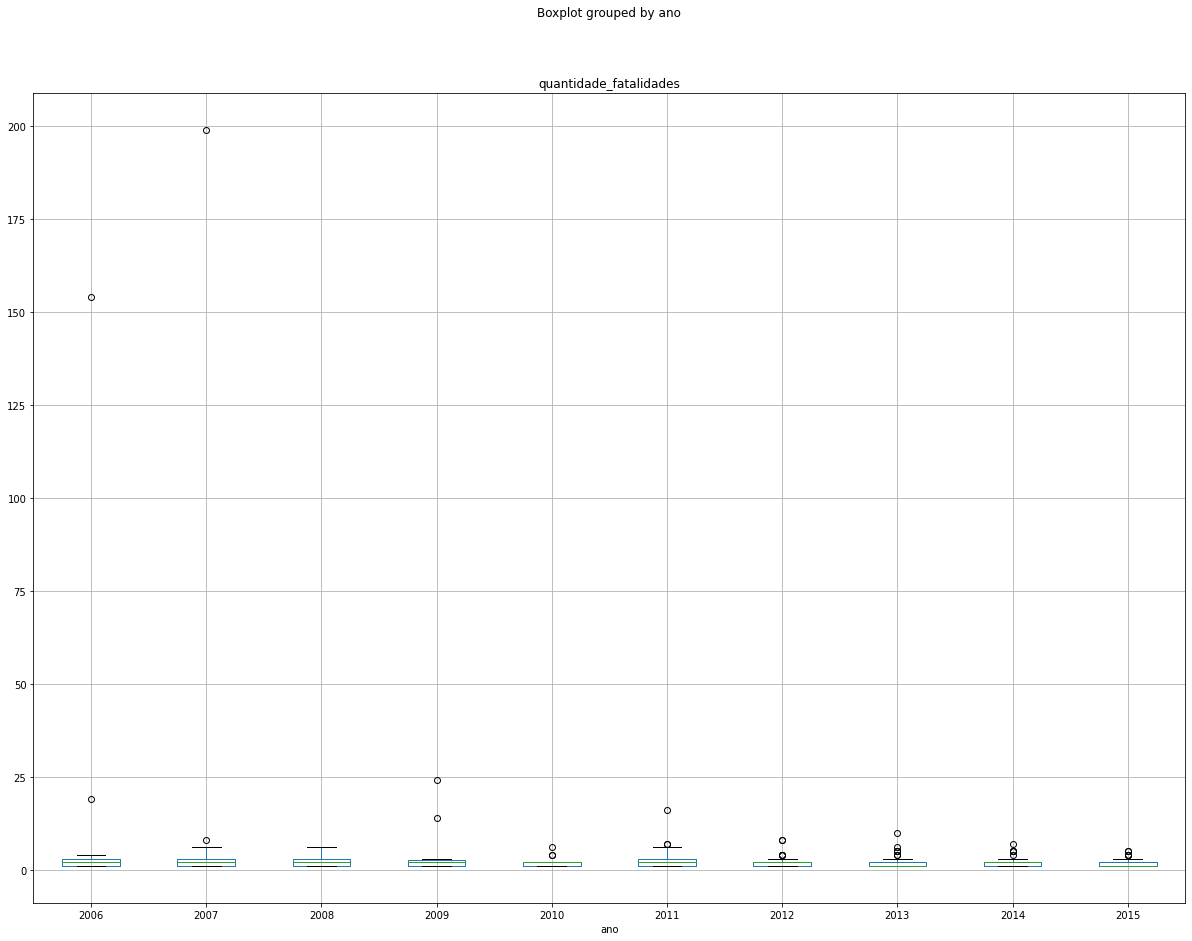

In [291]:
dfJoin = dfOcorrencia.join(dfAeronave.set_index('codigo_ocorrencia'))
dfJoin["ano"] = pd.DatetimeIndex(dfJoin['dia_ocorrencia']).year

dfJoin.boxplot(column="quantidade_fatalidades", by="ano", figsize=(20,15))

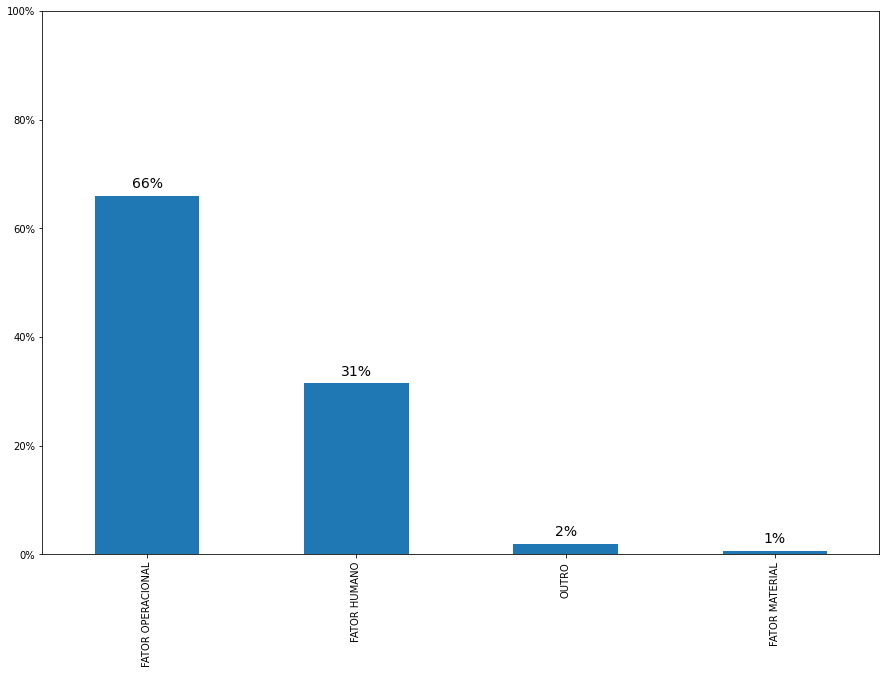

In [271]:
ax = dfOcorrencia.join(dfFatorContribuinte.set_index('codigo_ocorrencia3')).fator_area.value_counts(normalize=True).nlargest(5).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, format="{:.0%}")
formataEixo(plt, "y", 0, 1, "{:,.0%}")

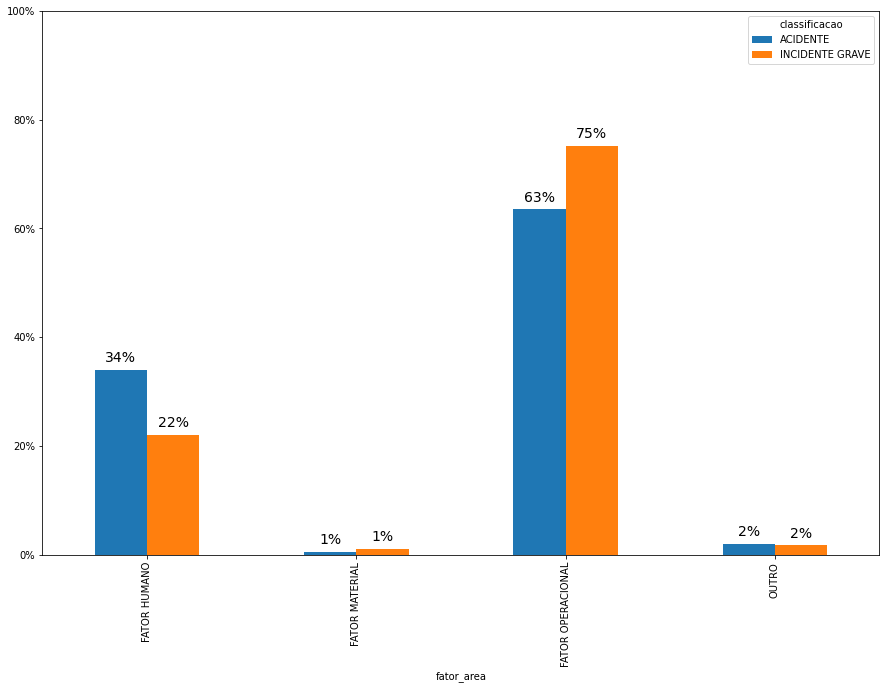

In [294]:
# ocorrência por fator contribuinte e classificação
ax = dfOcorrencia.join(dfFatorContribuinte.set_index('codigo_ocorrencia3')).groupby("classificacao").fator_area.value_counts(normalize=True).unstack(0).plot(figsize=(15, 10), kind='bar')
adicionarRotulos(ax, format="{:.0%}")
formataEixo(plt, "y", 0, 1, "{:,.0%}")